<a href="https://colab.research.google.com/github/AlejandroHerrera15/PROYECTO_IA/blob/main/Exploraci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KAGGLE COMPETENCIA

## Costa Rican Household Poverty Level Prediction
Can you identify which households have the highest need for social welfare assistance?

https://www.kaggle.com/c/costa-rican-household-poverty-prediction

In [16]:
!pip install kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"alejandroherrerar","key":"a266538c9ed8b4d58aa6d5b3bcf32743"}'}

In [25]:
!cp kaggle.json ~/.kaggle/

In [26]:
!kaggle competitions download -c costa-rican-household-poverty-prediction

 86% 2.00M/2.33M [00:00<00:00, 2.78MB/s]
100% 2.33M/2.33M [00:00<00:00, 2.74MB/s]


In [27]:
!unzip costa-rican-household-poverty-prediction

Archive:  costa-rican-household-poverty-prediction.zip
  inflating: codebook.csv            
  inflating: codebook.xlsx           
  inflating: sample_submission.csv   
  inflating: sample_submission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: train.csv               
  inflating: train.csv.zip           


In [4]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
df_train = pd.read_csv('train.csv')
df_train

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


v2a1, Pago mensual del alquiler

hacdor, =1 Hacinamiento por habitaciones

habitaciones, número de todas las habitaciones de la casa

hacapo, =1 Hacinamiento por habitaciones

v14a, =1 tiene baño en el hogar

refrig, =1 si el hogar tiene frigorífico

v18q, posee una tableta

v18q1, número de tabletas que posee el hogar

r4h1, Varones menores de 12 años

r4h2, Varones de 12 años o más

r4h3, Total de varones del hogar

r4m1, Mujeres menores de 12 años

r4m2, Mujeres de 12 años o más

r4m3, Total de mujeres en el hogar

r4t1, personas menores de 12 años

r4t2, Personas de 12 años o más

r4t3, Total de personas en el hogar

tamhog, tamaño del hogar

tamviv, número de personas que viven en el hogar

escolari, años de escolarización

rez_esc, Años de retraso escolar

hhsize, tamaño del hogar
---------------------------------------------------------------------------
paredblolad, =1 si el material predominante en la pared exterior es bloque o ladrillo
paredzocalo, "=1 si el material predominante en  la pared exterior es zócalo (madera, zinc o absbesto"
paredpreb, =1 si el material predominante en la pared exterior es prefabricado o cemento
pareddes, =1 si el material predominante en la pared exterior es material de desecho
paredmad, =1 si el material predominante en la pared exterior es madera
paredzinc, =1 si el material predominante en la pared exterior es cinc
paredfibras, =1 si el material predominante en la pared exterior son fibras naturales
paredother, =1 si el material predominante en la pared exterior es otro
pisomoscer, "=1 si el material predominante en el suelo es mosaico, cerámica, terrazo".
pisocemento, =1 si el material predominante en el suelo es cemento
pisoother, =1 si el material predominante en el suelo es otro
pisonatur, =1 si el material predominante del suelo es natural
pisonotiene, =1 si no hay suelo en el hogar
pisomadera, =1 si el material predominante del suelo es la madera
techozinc, =1 si el material predominante en el techo es lámina metálica o zink
techoentrepiso, "=1 si el material predominante en el techo es fibrocemento, entrepiso "
techocane, =1 si el material predominante en el tejado son fibras naturales
techootro, =1 si el material predominante en el tejado es otro
cielorazo, =1 si la casa tiene techo
abastaguadentro, =1 si la vivienda dispone de agua en su interior
abastaguafuera, =1 si dotación de agua fuera de la vivienda
abastaguano, =1 si no hay suministro de agua
público, "=1 electricidad de CNFL, ICE, ESPH/JASEC"
planpri, =1 electricidad de planta privada
noelec, =1 no hay electricidad en la vivienda
coopele, =1 electricidad de cooperativa
sanitario1, =1 no hay aseo en la vivienda
sanitario2, =1 inodoro conectado al alcantarillado o pozo negro
sanitario3, =1 inodoro conectado a fosa séptica
sanitario5, =1 inodoro conectado a pozo negro o letrina
sanitario6, =1 inodoro conectado a otro sistema
energcocinar1, =1 ninguna fuente principal de energía utilizada para cocinar (sin cocina)
energcocinar2, =1 principal fuente de energía utilizada para cocinar electricidad
energcocinar3, =1 principal fuente de energía utilizada para cocinar gas
energcocinar4, =1 principal fuente de energía utilizada para cocinar carbón de leña
elimbasu1, =1 si la basura se elimina principalmente con camiones cisterna
elimbasu2, =1 si la eliminación de basuras se realiza principalmente en huecos botánicos o enterrados
elimbasu3, =1 si la basura se elimina principalmente quemándola
elimbasu4, =1 si la eliminación se realiza principalmente arrojando la basura a un lugar desocupado
elimbasu5, "=1 si la eliminación de residuos se realiza principalmente arrojándolos al río, arroyo o mar".
elimbasu6, =1 si la eliminación se realiza principalmente en otros lugares
epared1, =1 si las paredes están en mal estado
epared2, =1 si las paredes son regulares
epared3, =1 si las paredes son buenas
etecho1, =1 si el tejado es malo
etecho2, =1 si el tejado es regular
etecho3, =1 si el techo es bueno
eviv1, =1 si el suelo está mal
eviv2, =1 si el suelo es regular
eviv3, =1 si el suelo es bueno
dis, =1 si persona discapacitada
hombre, =1 si hombre
mujer, =1 si mujer
estadocivil1, =1 si tiene menos de 10 años
estadocivil2, =1 si libre o acoplado uunion
estadocivil3, =1 si casado
estadocivil4, =1 si divorciado
estadocivil5, =1 si separado
estadocivil6, =1 si viudo/a
estadocivil7, =1 si soltero/a
parentesco1, =1 si es cabeza de familia
parentesco2, =1 si cónyuge/pareja
parentesco3, =1 si hijo/dueño
parentesco4, =1 si hijastro/dueño
parentesco5, =1 si yerno/dueño político
parentesco6, =1 si nieto/dueño
parentesco7, =1 si madre/padre
parentesco8, =1 si padre/suegra
parentesco9, =1 si hermano/hermana
parentesco10, =1 si hermano/suegra
parentesco11, =1 si otro miembro de la familia
parentesco12, =1 si otro no familiar
----------------------------------------------------------------------------------
idhogar, Identificador a nivel de hogar
hogar_nin, Número de niños de 0 a 19 años en el hogar
hogar_adul, Número de adultos en el hogar
hogar_mayor, # de individuos mayores de 65 años en el hogar
hogar_total, Número total de personas en el hogar
dependencia, Tasa de dependencia, calculada = (número de miembros del hogar menores de 19 años o mayores de 64)/(número de miembros del hogar entre 19 y 64 años)
edjefe, años de educación del cabeza de familia varón, basado en la interacción de escolari (años de educación), cabeza de familia y género, sí=1 y no=0
edjefa, años de educación del cabeza de familia femenino, basado en la interacción de escolari (años de educación), cabeza de familia y sexo, sí=1 y no=0
meaneduc,promedio de años de educación de los adultos (18+)
instlevel1, =1 ningún nivel de educación
instlevel2, =1 primaria incompleta
instlevel3, =1 primaria completa
instlevel4, =1 nivel secundario académico incompleto
instlevel5, =1 nivel secundario académico completo
instlevel6, =1 nivel secundario técnico incompleto
instlevel7, =1 nivel secundario técnico completo
instlevel8, =1 estudios universitarios y superiores
instlevel9, =1 enseñanza superior de posgrado
dormitorios, número de dormitorios
hacinamiento, nº de personas por habitación
tipovivi1, =1 vivienda propia y totalmente pagada
tipovivi2, "=1 propia, pagando a plazos"
tipovivi3, =1 alquilada
tipovivi4, =1 precario
tipovivi5, "=1 otro(cedido, prestado)"
ordenador, =1 si el hogar dispone de ordenador portátil o de sobremesa
televisión, =1 si el hogar dispone de televisión
teléfono móvil, =1 si tiene teléfono móvil
qteléfono móvil, nº de teléfonos móviles
lugar1, =1 región Central
lugar2, =1 región Chorotega
lugar3, =1 región PacÃƒÂfico central
lugar4, =1 región Brunca
lugar5, =1 región Huetar AtlÃƒÂ¡ntica
lugar6, =1 región Huetar Norte
area1, =1 zona urbana
area2, =2 zona rural
age, Edad en años
SQBescolari, escolari al cuadrado
SQBage, edad al cuadrado
SQBhogar_total, hogar_total al cuadrado
SQBedjefe, edjefe al cuadrado
SQBhogar_nin, hogar_nin al cuadrado
SQAbarrotamiento, hacinamiento al cuadrado
SQBdependencia, dependencia al cuadrado
SQBmeaned, cuadrado de los años medios de educación de los adultos (>=18) del hogar
agesq, edad al cuadrado

In [ ]:
tabla=df_train.copy()

paredblolad, =1 si el material predominante en la pared exterior es bloque o ladrillo
paredzocalo, "=1 si el material predominante en la pared exterior es zócalo (madera, zinc o absbesto"
paredpreb, =1 si el material predominante en la pared exterior es prefabricado o cemento
pareddes, =1 si el material predominante en la pared exterior es material de desecho
paredmad, =1 si el material predominante en la pared exterior es madera
paredzinc, =1 si el material predominante en la pared exterior es cinc
paredfibras, =1 si el material predominante en la pared exterior son fibras naturales
paredother, =1 si el material predominante en la pared exterior es otro

In [31]:
# Realizar una función utilizando múltiples columnas
def funcion1(fila):
  if fila['paredblolad'] == 1:
    valor = 'paredblolad'
  elif  fila['paredzocalo'] == 1:
    valor = 'paredzocalo'
  elif  fila['paredpreb'] == 1:
    valor = 'paredpreb'
  elif  fila['pareddes'] == 1:
    valor = 'pareddes'
  elif  fila['paredmad'] == 1:
    valor = 'paredmad'
  elif  fila['paredzinc'] == 1:
    valor = 'paredzinc'
  elif  fila['paredfibras'] == 1:
    valor = 'paredfibras'  
  else:
    valor = "paredother"
  return valor

In [32]:
tabla['tipodepared']= tabla.apply(funcion1, axis=1)
tabla.drop(['paredblolad','paredzocalo','paredpreb','pareddes','paredmad','paredzinc','paredfibras'], axis=1, inplace=True)


pisomoscer, "=1 si el material predominante en el suelo es mosaico, cerámica, terrazo".
pisocemento, =1 si el material predominante en el suelo es cemento
pisoother, =1 si el material predominante en el suelo es otro
pisonatur, =1 si el material predominante del suelo es natural
pisonotiene, =1 si no hay suelo en el hogar
pisomadera, =1 si el material predominante del suelo es la madera

In [35]:
def funcion2(fila):
  if fila['pisomoscer'] == 1:
    valor = 'pisomoscer'
  elif  fila['pisocemento'] == 1:
    valor = 'pisocemento'
  elif  fila['pisoother'] == 1:
    valor = 'pisoother'
  elif  fila['pisonatur'] == 1:
    valor = 'pisonatur'
  elif  fila['pisonotiene'] == 1:
    valor = 'pisonotiene'
  else:
    valor = "pisomadera"
  return valor

In [36]:
tabla['tipodepiso']= tabla.apply(funcion2, axis=1)
tabla.drop(['pisomoscer','pisocemento','pisoother','pisonatur','pisonotiene','pisomadera'], axis=1, inplace=True)

sanitario1, =1 no hay aseo en la vivienda
sanitario2, =1 inodoro conectado al alcantarillado o pozo negro
sanitario3, =1 inodoro conectado a fosa séptica
sanitario5, =1 inodoro conectado a pozo negro o letrina
sanitario6, =1 inodoro conectado a otro sistema

In [37]:
def funcion3(fila):
  if fila['sanitario1'] == 1:
    valor = 'sanitario1'
  elif  fila['sanitario2'] == 1:
    valor = 'sanitario2'
  elif  fila['sanitario3'] == 1:
    valor = 'sanitario3'
  elif  fila['sanitario5'] == 1:
    valor = 'sanitario5'
  else:
    valor = "sanitario6"
  return valor

In [38]:
tabla['tipodesanitario']= tabla.apply(funcion3, axis=1)
tabla.drop(['sanitario1','sanitario2','sanitario3','sanitario5','sanitario6'], axis=1, inplace=True)

energcocinar1, =1 ninguna fuente principal de energía utilizada para cocinar (sin cocina)
energcocinar2, =1 principal fuente de energía utilizada para cocinar electricidad
energcocinar3, =1 principal fuente de energía utilizada para cocinar gas
energcocinar4, =1 principal fuente de energía utilizada para cocinar carbón de leña

In [39]:
def funcion4(fila):
  if fila['energcocinar1'] == 1:
    valor = 'energcocinar1'
  elif  fila['energcocinar2'] == 1:
    valor = 'energcocinar2'
  elif  fila['energcocinar3'] == 1:
    valor = 'energcocinar3'
  else: 
    valor = "energcocinar4"
  return valor

In [40]:
tabla['energiacocinar']= tabla.apply(funcion4, axis=1)
tabla.drop(['energcocinar1','energcocinar2','energcocinar3','energcocinar4'], axis=1, inplace=True)

elimbasu1, =1 si la basura se elimina principalmente con camiones cisterna
elimbasu2, =1 si la eliminación de basuras se realiza principalmente en huecos botánicos o enterrados
elimbasu3, =1 si la basura se elimina principalmente quemándola
elimbasu4, =1 si la eliminación se realiza principalmente arrojando la basura a un lugar desocupado
elimbasu5, "=1 si la eliminación de residuos se realiza principalmente arrojándolos al río, arroyo o mar".
elimbasu6, =1 si la eliminación se realiza principalmente en otros lugares

In [42]:
def funcion4(fila):
  if fila['elimbasu1'] == 1:
    valor = 'elimbasu1'
  elif  fila['elimbasu2'] == 1:
    valor = 'elimbasu2'
  elif  fila['elimbasu3'] == 1:
    valor = 'elimbasu3'
  elif  fila['elimbasu4'] == 1:
    valor = 'elimbasu4'
  elif  fila['elimbasu5'] == 1:
    valor = 'elimbasu5'
  else:
    valor = "elimbasu6"
  return valor

In [43]:
tabla['eliminacionbasuras']= tabla.apply(funcion4, axis=1)
tabla.drop(['elimbasu1','elimbasu2','elimbasu3','elimbasu4','elimbasu5',"elimbasu6"], axis=1, inplace=True)

epared1, =1 si las paredes están en mal estado
epared2, =1 si las paredes son regulares
epared3, =1 si las paredes son buenas
etecho1, =1 si el tejado es malo
etecho2, =1 si el tejado es regular
etecho3, =1 si el techo es bueno
eviv1, =1 si el suelo está mal
eviv2, =1 si el suelo es regular
eviv3, =1 si el suelo es bueno

In [44]:
def funcion5(fila):
  if fila['epared1'] == 1:
    valor = 'epared1'
  elif  fila['epared2'] == 1:
    valor = 'epared2'
  else: 
    valor = "epared3"
  return valor

def funcion6(fila):
  if fila['etecho1'] == 1:
    valor = 'etecho1'
  elif  fila['etecho2'] == 1:
    valor = 'etecho2'
  else: 
    valor = "etecho3"
  return valor

def funcion7(fila):
  if fila['eviv1'] == 1:
    valor = 'eviv1'
  elif  fila['eviv2'] == 1:
    valor = 'eviv2'
  else: 
    valor = "eviv3"
  return valor



In [45]:
tabla['estadopared']= tabla.apply(funcion5, axis=1)
tabla.drop(['epared1','epared2','epared3'], axis=1, inplace=True)

tabla['estadotecho']= tabla.apply(funcion6, axis=1)
tabla.drop(['etecho1','etecho2','etecho3'], axis=1, inplace=True)

tabla['estadosuelo']= tabla.apply(funcion7, axis=1)
tabla.drop(['eviv1','eviv2','eviv3'], axis=1, inplace=True)

estadocivil1, =1 si tiene menos de 10 años
estadocivil2, =1 si libre o acoplado uunion
estadocivil3, =1 si casado
estadocivil4, =1 si divorciado
estadocivil5, =1 si separado
estadocivil6, =1 si viudo/a
estadocivil7, =1 si soltero/a
parentesco1, =1 si es cabeza de familia
parentesco2, =1 si cónyuge/pareja
parentesco3, =1 si hijo/dueño
parentesco4, =1 si hijastro/dueño
parentesco5, =1 si yerno/dueño político
parentesco6, =1 si nieto/dueño
parentesco7, =1 si madre/padre
parentesco8, =1 si padre/suegra
parentesco9, =1 si hermano/hermana
parentesco10, =1 si hermano/suegra
parentesco11, =1 si otro miembro de la familia
parentesco12, =1 si otro no familiar

In [51]:
def funcion8(fila):
  if fila['estadocivil1'] == 1:
    valor = 'estadocivil1'
  elif  fila['estadocivil2'] == 1:
    valor = 'estadocivil2'
  elif  fila['estadocivil3'] == 1:
    valor = 'estadocivil3'
  elif  fila['estadocivil4'] == 1:
    valor = 'estadocivil4'
  elif  fila['estadocivil5'] == 1:
    valor = 'estadocivil5'
  elif  fila['estadocivil6'] == 1:
    valor = 'estadocivil6'
  else:
    valor = "estadocivil7"
  return valor

def funcion9(fila):
  if fila['parentesco1'] == 1:
    valor = 'parentesco1'
  elif  fila['parentesco2'] == 1:
    valor = 'parentesco2'
  elif  fila['parentesco3'] == 1:
    valor = 'parentesco3'
  elif  fila['parentesco4'] == 1:
    valor = 'parentesco4'
  elif  fila['parentesco5'] == 1:
    valor = 'parentesco5'
  elif  fila['parentesco6'] == 1:
    valor = 'parentesco6'
  elif  fila['parentesco7'] == 1:
    valor = 'parentesco7'
  elif  fila['parentesco8'] == 1:
    valor = 'parentesco8'
  elif  fila['parentesco9'] == 1:
    valor = 'parentesco9'
  elif  fila['parentesco10'] == 1:
    valor = 'parentesco10'
  elif  fila['parentesco11'] == 1:
    valor = 'parentesco11'
  else:
    valor = "parentesco12"
  return valor



In [52]:
tabla['estadocivil']= tabla.apply(funcion8, axis=1)
tabla.drop(['estadocivil1','estadocivil2','estadocivil3','estadocivil4','estadocivil5','estadocivil6'], axis=1, inplace=True)

tabla['parentesco']= tabla.apply(funcion9, axis=1)
tabla.drop(['parentesco1','parentesco2','parentesco3','parentesco4','parentesco5','parentesco6','parentesco7','parentesco8','parentesco9','parentesco10','parentesco11'], axis=1, inplace=True)

instlevel1, =1 ningún nivel de educación
instlevel2, =1 primaria incompleta
instlevel3, =1 primaria completa
instlevel4, =1 nivel secundario académico incompleto
instlevel5, =1 nivel secundario académico completo
instlevel6, =1 nivel secundario técnico incompleto
instlevel7, =1 nivel secundario técnico completo
instlevel8, =1 estudios universitarios y superiores
instlevel9, =1 enseñanza superior de posgrado

tipovivi1, =1 vivienda propia y totalmente pagada
tipovivi2, "=1 propia, pagando a plazos"
tipovivi3, =1 alquilada
tipovivi4, =1 precario
tipovivi5, "=1 otro(cedido, prestado)"

lugar1, =1 región Central
lugar2, =1 región Chorotega
lugar3, =1 región PacÃƒÂfico central
lugar4, =1 región Brunca
lugar5, =1 región Huetar AtlÃƒÂ¡ntica
lugar6, =1 región Huetar Norte

In [54]:
def funcion10(fila):
  if fila['tipovivi1'] == 1:
    valor = 'tipovivi1'
  elif  fila['tipovivi2'] == 1:
    valor = 'tipovivi2'
  elif  fila['tipovivi3'] == 1:
    valor = 'tipovivi3'
  elif  fila['tipovivi4'] == 1:
    valor = 'tipovivi4'
  else:
    valor = "tipovivi5"
  return valor

def funcion11(fila):
  if fila['instlevel1'] == 1:
    valor = 'instlevel1'
  elif  fila['instlevel2'] == 1:
    valor = 'instlevel2'
  elif  fila['instlevel3'] == 1:
    valor = 'instlevel3'
  elif  fila['instlevel4'] == 1:
    valor = 'instlevel4'
  elif  fila['instlevel5'] == 1:
    valor = 'instlevel5'
  elif  fila['instlevel6'] == 1:
    valor = 'instlevel6'
  elif  fila['instlevel7'] == 1:
    valor = 'instlevel7'
  elif  fila['instlevel8'] == 1:
    valor = 'instlevel8'
  else:
    valor = "instlevel9"
  return valor

def funcion12(fila):
  if fila['lugar1'] == 1:
    valor = 'lugar1'
  elif  fila['lugar2'] == 1:
    valor = 'lugar2'
  elif  fila['lugar3'] == 1:
    valor = 'lugar3'
  elif  fila['lugar4'] == 1:
    valor = 'lugar4'
  elif  fila['lugar5'] == 1:
    valor = 'lugar5'
  else:
    valor = "lugar6"
  return valor

In [55]:
tabla['tipovivienda']= tabla.apply(funcion10, axis=1)
tabla.drop(['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5'], axis=1, inplace=True)

tabla['niveleducacion']= tabla.apply(funcion11, axis=1)
tabla.drop(['instlevel1','instlevel2','instlevel3','instlevel4','instlevel5','instlevel6','instlevel7','instlevel8','instlevel9'], axis=1, inplace=True)

tabla['region']= tabla.apply(funcion12, axis=1)
tabla.drop(['lugar1','lugar2','lugar3','lugar4','lugar5'], axis=1, inplace=True)

In [56]:
tabla.shape

(9557, 81)

<Axes: >

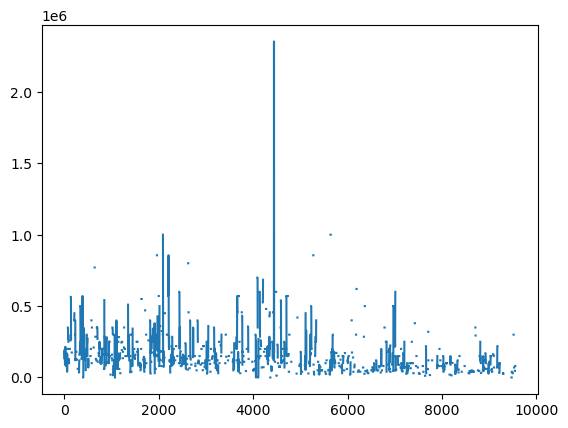

In [20]:
df_train["v2a1"].plot()

C:\Users\Luisa\AppData\Local\Temp\ipykernel_21528\2240580113.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),cmap = sns.cubehelix_palette(as_cmap=True), annot = True, fmt = ".2f")


<Axes: >

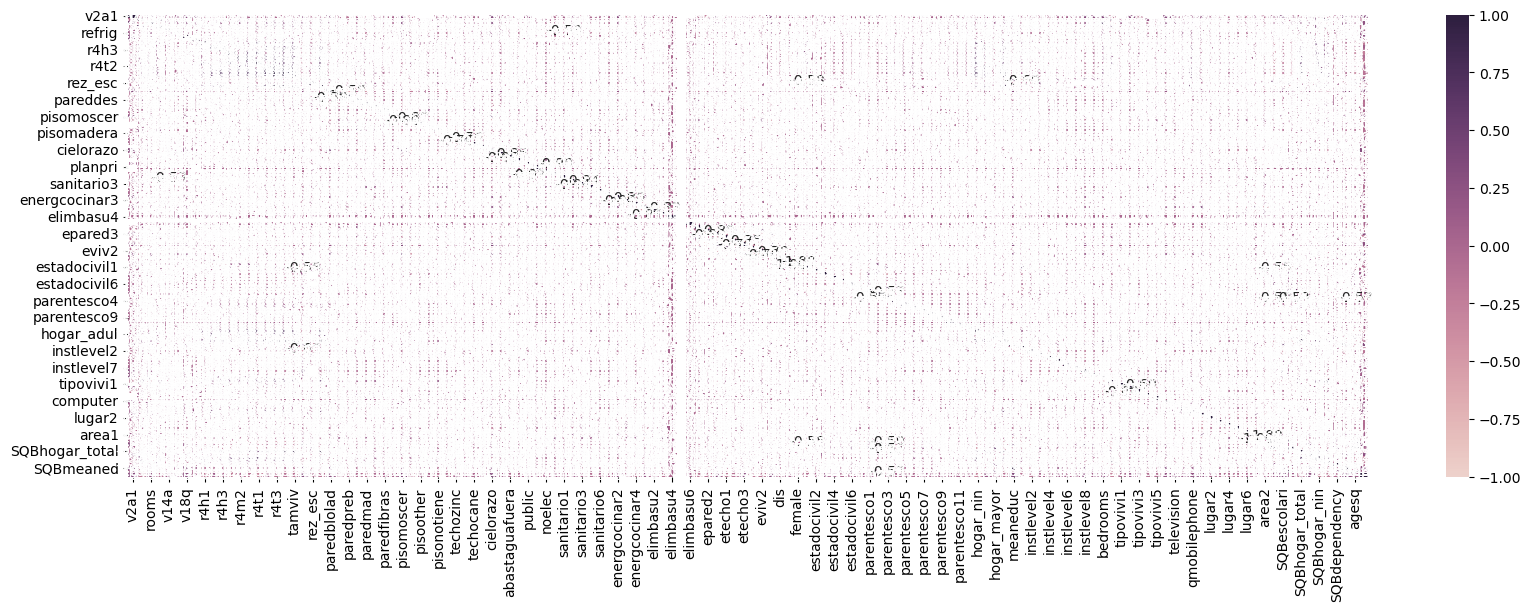

In [23]:
from matplotlib.pyplot import figure
columnasnumericas=df_train.select_dtypes(include=['int64', 'float64'])
figure(figsize=(20,6))
sns.heatmap(df_train.corr(),cmap = sns.cubehelix_palette(as_cmap=True), annot = True, fmt = ".2f")

In [19]:
df_train.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

In [30]:
df_train['Target'].describe()

count    9557.000000
mean        3.302292
std         1.009565
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: Target, dtype: float64

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [32]:
columnas_categoricas = df_train.select_dtypes(include=['object'])
print(columnas_categoricas)

                Id    idhogar dependency edjefe edjefa
0     ID_279628684  21eb7fcc1         no     10     no
1     ID_f29eb3ddd  0e5d7a658          8     12     no
2     ID_68de51c94  2c7317ea8          8     no     11
3     ID_d671db89c  2b58d945f        yes     11     no
4     ID_d56d6f5f5  2b58d945f        yes     11     no
...            ...        ...        ...    ...    ...
9552  ID_d45ae367d  d6c086aa3        .25      9     no
9553  ID_c94744e07  d6c086aa3        .25      9     no
9554  ID_85fc658f8  d6c086aa3        .25      9     no
9555  ID_ced540c61  d6c086aa3        .25      9     no
9556  ID_a38c64491  d6c086aa3        .25      9     no

[9557 rows x 5 columns]


In [ ]:
df_train['Target'].describe()

count    9557.000000
mean        3.302292
std         1.009565
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: Target, dtype: float64